In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import curve_fit
from scipy.io import wavfile
from scipy import signal, fftpack
%matplotlib widget

In [27]:
class wave_1d:
    def __init__(self, L=1.0, c=1.0, dx=0.005, nsteps=200):
        self.L = L  # string length
        self.c = c  # wave speed
        self.dx = dx # spatial sampling rate
        self.dt = dx/c #time sampling rate
        self.x = np.arange(0, L*(1+dx), dx)
        self.xc = L/2.0
        self.fig, self.ax = plt.subplots()
        self.line, = self.ax.plot([], [])
        self.ani = animation.FuncAnimation(self.fig, self.animate, init_func=self.animate_init, frames=nsteps, interval=20, blit=True)
        self.nsteps = nsteps
        
    def initial_condition(self, form = "gaussian"):
        
        if(form == "gaussian"):
            y = np.zeros((len(self.x), 3)) #initalize three time samples
            y[:, 0] = np.exp((-(self.x-self.xc)**2)/(0.001)) # initial condition
            y[1:-1, 1] = y[1:-1, 0] + 0.5*self.c**2*(self.dt/self.dx)**2 * (y[2:,0] + y[:-2,0]-2*y[1:-1,0]) # initialize array

            return y
    
    def animate(self, y):
        y[1:-1,2] = 2*y[1:-1,1] - y[1:-1,0] + self.c**2*(self.dt/self.dx)**2 * (y[2:,1] + y[:-2,1] - 2*y[1:-1,1])
        y[1:-1,0] = y[1:-1,1]
        y[1:-1,1] = y[1:-1,2]
        self.line.set_data(x, y[:,2])
        return self.line,

    def animate_init(self):
        self.ax.set_xlim(0, self.L)
        self.ax.set_ylim(-2, 2)
        return self.line,
    
    def show(self):
        plt.show()

        



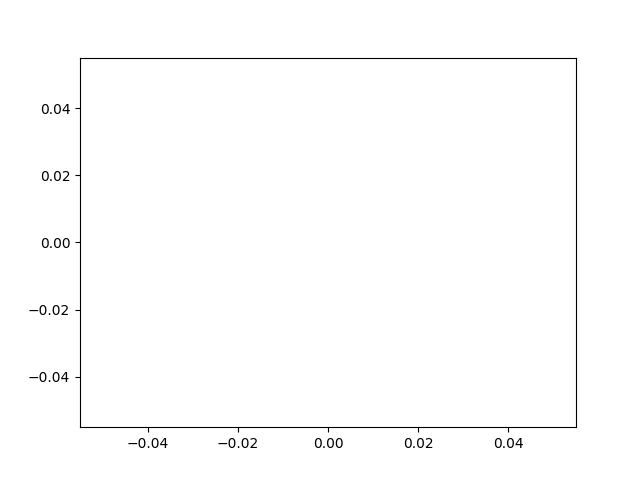

In [28]:
plt.close('all')

s1 = wave_1d()

s1.initial_condition()

s1.show()


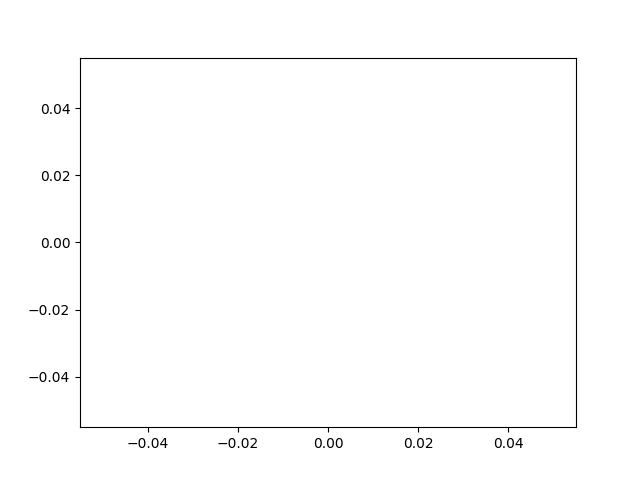

In [25]:
#standing waves
#this program shows in a video the 1d wave eqaution with various initial conditions
#define parameters
plt.close('all')

L = 1.0 # 1 meter long system terminated on both ends
dx = 0.005 # spatial sampling rate
c = 1.0 # wavespeed in medium

dt=dx/c # define timestep to satisfy CFL condition. Info cannot travel further than dx during a timestep dt

x = np.arange(0, L*(1+dx), dx) 
npts = len(x) # number of spatial points along x
nsteps = 200 #number of simulated timesteps

# Create the figure and axes
fig, ax = plt.subplots()
line, = ax.plot([], [])


# Initialization function: plot the background of each frame
def init():
    ax.set_xlim(0, L)
    ax.set_ylim(-2, 2)
    return line,
y = np.zeros((npts, 3)) #initalize three time samples

#initial condition
y[:, 0] = np.sin(2*np.pi*x/L) + 0.5*np.sin(2*2*np.pi*x/L) + 0.5*np.sin(3*2*np.pi*x/L)# initial condition


#pre loop setup
y[1:-1, 1] = y[1:-1, 0] + 0.5*c**2*(dt/dx)**2 * (y[2:,0] + y[:-2,0]-2*y[1:-1,0]) # initialize array

# Animation function: called sequentially
def animate(k):
    y[1:-1,2] = 2*y[1:-1,1] - y[1:-1,0] + c**2*(dt/dx)**2 * (y[2:,1] + y[:-2,1] - 2*y[1:-1,1])
    y[1:-1,0] = y[1:-1,1]
    y[1:-1,1] = y[1:-1,2]
    line.set_data(x, y[:,2])
    return line,



# Create the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=nsteps, interval=20, blit=True)
plt.show()

# Save the animation as a GIF
#ani.save('standing_wave.gif', writer='pillow')


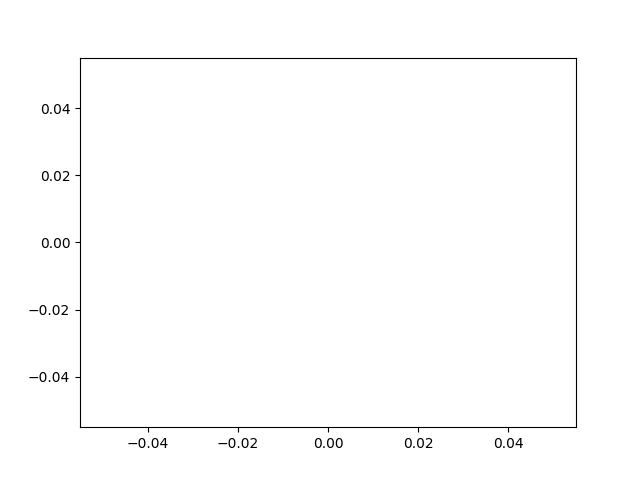

In [5]:
#Gaussian Pulse
plt.close('all')

L = 1.0 # 1 meter long system terminated on both ends
dx = 0.005 # spatial sampling rate
c = 1.0 # wavespeed in medium

dt=dx/c # define timestep to satisfy CFL condition. Info cannot travel further than dx during a timestep dt

x = np.arange(0, L*(1+dx), dx) 
npts = len(x) # number of spatial points along x
nsteps = 400 #number of simulated timesteps

# Create the figure and axes
fig, ax = plt.subplots()
line, = ax.plot([], [])

# Initialization function: plot the background of each frame
def init():
    ax.set_xlim(0, L)
    ax.set_ylim(-2, 2)
    return line,

y = np.zeros((npts, 3)) #initalize three time samples

xc = L/2
y[:, 0] = np.exp((-(x-xc)**2)/(0.001)) # initial condition

y[1:-1, 1] = y[1:-1, 0] + 0.5*c**2*(dt/dx)**2 * (y[2:,0] + y[:-2,0]-2*y[1:-1,0]) # initialize array

# Animation function: called sequentially
def animate(k):
    y[1:-1,2] = 2*y[1:-1,1] - y[1:-1,0] + c**2*(dt/dx)**2 * (y[2:,1] + y[:-2,1] - 2*y[1:-1,1])
    y[1:-1,0] = y[1:-1,1]
    y[1:-1,1] = y[1:-1,2]
    line.set_data(x, y[:,2])
    return line,
    #return y[:,2]


# Create the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=nsteps, interval=20, blit=True)

# Save the animation as a GIF
#ani.save('gaussian_pulse.gif', writer='pillow')

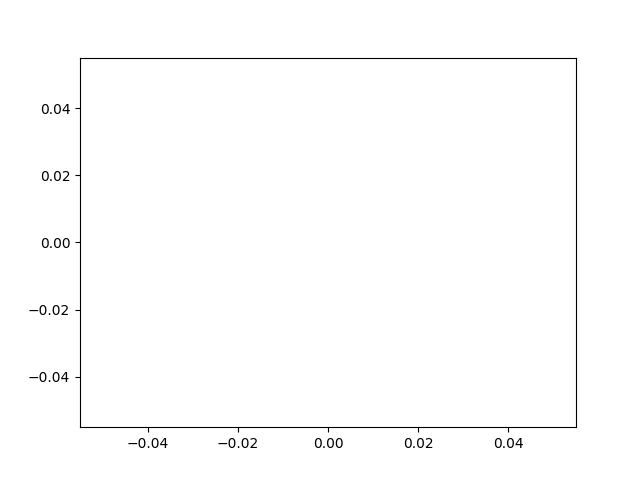

In [4]:
# elastic string

L = 3.0 # 1 meter long system terminated on both ends
dx = 0.005 # spatial sampling rate
c = 1.0 # wavespeed in medium
mu = 1 #loss coeff

dt=dx/c/2 # define timestep to satisfy CFL condition. Info cannot travel further than dx during a timestep dt


x = np.arange(0, L*(1+dx), dx) 
npts = len(x) # number of spatial points along x
nsteps = 400 #number of simulated timesteps

# Create the figure and axes
fig, ax = plt.subplots()
line, = ax.plot([], [])

# Initialization function: plot the background of each frame
def init():
    ax.set_xlim(0, L)
    ax.set_ylim(-2, 2)
    return line,

y = np.zeros((npts, 3)) #initalize three time samples


xc = L/2
y[:, 0] = np.exp((-(x-xc)**2)/(0.01)) # initial condition
dy = y[2:,0] - y[1:-1,0] 
y[1:-1, 1] = y[1:-1, 0] + 0.5*c**2*(dt/dx)**2 * (y[2:,0] + y[:-2,0]-2*y[1:-1,0])  # initialize array

# Animation function: called sequentially
def animate(k):
    dy2 = (y[2:,1] + y[:-2,1] - 2*y[1:-1,1])
    dy = y[2:,1] - y[1:-1,1] 

    y[1:-1,2] = 2*y[1:-1,1] - y[1:-1,0] + c**2*(dt/dx)**2*dy2 -mu*y[1:-1,1]*dt**2
    y[1:-1,0] = y[1:-1,1]
    y[1:-1,1] = y[1:-1,2]
    line.set_data(x, y[:,2])
    return line,
    #return y[:,2]


# Create the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=nsteps, interval=20, blit=True)

# Save the animation as a GIF
#ani.save('pulse_lossy.gif', writer='pillow')

In [ ]:
#this cell shows the gaussian pulse modeled as finite sum of standing waves

plt.close('all')

L = 1.0 # 1 meter long system terminated on both ends
dx = 0.005 # spatial sampling rate
c = 1.0 # wavespeed in medium

dt=dx/c # define timestep to satisfy CFL condition. Info cannot travel further than dx during a timestep dt

x = np.arange(0, L*(1+dx), dx) 
npts = len(x) # number of spatial points along x
nsteps = 400 #number of simulated timesteps

# Create the figure and axes
fig, ax = plt.subplots()
line, = ax.plot([], [])

# Initialization function: plot the background of each frame
def init():
    ax.set_xlim(0, L)
    ax.set_ylim(-2, 2)
    return line,

y = np.zeros((npts, 3)) #initalize three time samples

xc = L/2
y[:, 0] = np.exp((-(x-xc)**2)/(0.01)) # initial condition

y[1:-1, 1] = y[1:-1, 0] + 0.5*c**2*(dt/dx)**2 * (y[2:,0] + y[:-2,0]-2*y[1:-1,0]) # initialize array

# Animation function: called sequentially
def animate(k):
    y[1:-1,2] = 2*y[1:-1,1] - y[1:-1,0] + c**2*(dt/dx)**2 * (y[2:,1] + y[:-2,1] - 2*y[1:-1,1])
    y[1:-1,0] = y[1:-1,1]
    y[1:-1,1] = y[1:-1,2]
    line.set_data(x, y[:,2])
    return line,
    #return y[:,2]


# Create the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=nsteps, interval=20, blit=True)

# Save the animation as a GIF
#ani.save('gaussian_pulse.gif', writer='pillow')

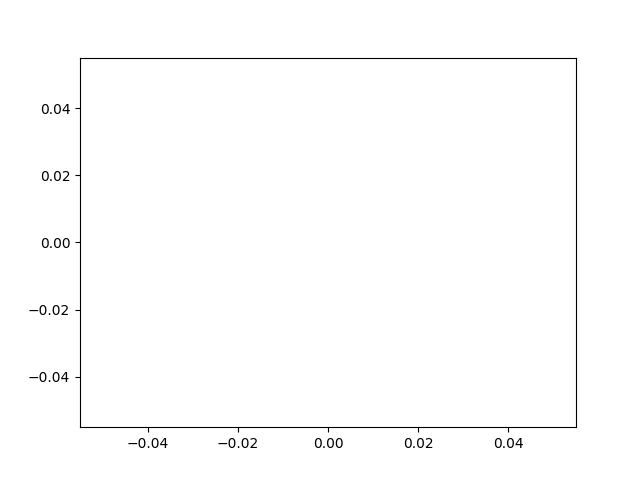

In [3]:
# lossy string

L = 3.0 # 1 meter long system terminated on both ends
dx = 0.005 # spatial sampling rate
c = 1.0 # wavespeed in medium
mu = 0.01 #loss coeff

dt=dx/c/10 # define timestep to satisfy CFL condition. Info cannot travel further than dx during a timestep dt


x = np.arange(0, L*(1+dx), dx) 
npts = len(x) # number of spatial points along x
nsteps = 200 #number of simulated timesteps

# Create the figure and axes
fig, ax = plt.subplots()
line, = ax.plot([], [])

# Initialization function: plot the background of each frame
def init():
    ax.set_xlim(0, L)
    ax.set_ylim(-2, 2)
    return line,

y = np.zeros((npts, 3)) #initalize three time samples


xc = L/2
y[:, 0] = np.exp((-(x-xc)**2)/(0.01)) # initial condition
#y[:, 0] = np.sin(2*np.pi*x/L)
dy = y[2:,0] - y[1:-1,0] 
y[1:-1, 1] = y[1:-1, 0] + 0.5*c**2*(dt/dx)**2 * (y[2:,0] + y[:-2,0]-2*y[1:-1,0])  # initialize array

# Animation function: called sequentially
def animate(k):
    dy2 = (y[2:,1] + y[:-2,1] - 2*y[1:-1,1])
    dy = y[2:,1] - y[1:-1,1] 

    y[1:-1,2] = 2*y[1:-1,1] - y[1:-1,0] + c**2*(dt/dx)**2*dy2 -mu*(y[1:-1,1]-y[1:-1,0])*dt
    y[1:-1,0] = y[1:-1,1]
    y[1:-1,1] = y[1:-1,2]
    line.set_data(x, y[:,2])
    return line,
    #return y[:,2]


# Create the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=nsteps, interval=20, blit=True)

# Save the animation as a GIF
#ani.save('pulse_lossy.gif', writer='pillow')

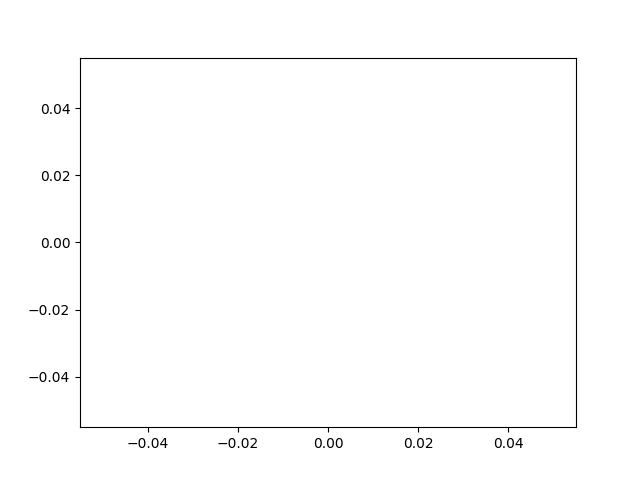

In [6]:
# lossy and elastic string

L = 3.0 # 1 meter long system terminated on both ends
dx = 0.005 # spatial sampling rate
c = 1.0 # wavespeed in medium
mu = 0.001 #loss coeff
k = 0.001 #elasticity

dt=dx/c/10 # define timestep to satisfy CFL condition. Info cannot travel further than dx during a timestep dt


x = np.arange(0, L*(1+dx), dx) 
npts = len(x) # number of spatial points along x
nsteps = 200 #number of simulated timesteps

# Create the figure and axes
fig, ax = plt.subplots()
line, = ax.plot([], [])

# Initialization function: plot the background of each frame
def init():
    ax.set_xlim(0, L)
    ax.set_ylim(-2, 2)
    return line,

y = np.zeros((npts, 3)) #initalize three time samples


xc = L/2
y[:, 0] = np.exp((-(x-xc)**2)/(0.01)) # initial condition
#y[:, 0] = np.sin(2*40*np.pi*x/L)
dy = y[2:,0] - y[1:-1,0] 
y[1:-1, 1] = y[1:-1, 0] + 0.5*c**2*(dt/dx)**2 * (y[2:,0] + y[:-2,0]-2*y[1:-1,0])  # initialize array

# Animation function: called sequentially
def animate(k):
    dy2 = (y[2:,1] + y[:-2,1] - 2*y[1:-1,1])
    dy = y[2:,1] - y[1:-1,1] 

    y[1:-1,2] = 2*y[1:-1,1] - y[1:-1,0] + c**2*(dt/dx)**2*dy2 -mu*(y[1:-1,1]-y[1:-1,0])*dt- k*y[1:-1,1]*dt**2
    y[1:-1,0] = y[1:-1,1]
    y[1:-1,1] = y[1:-1,2]
    line.set_data(x, y[:,2])
    return line,
    #return y[:,2]


# Create the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=nsteps, interval=20, blit=True)

# Save the animation as a GIF
#ani.save('pulse_lossy.gif', writer='pillow')

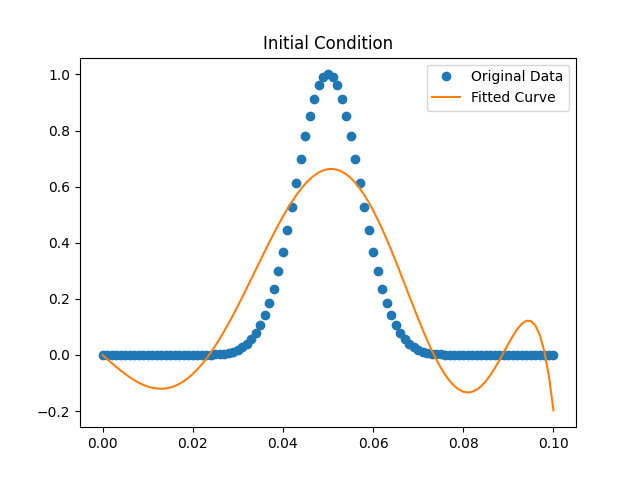

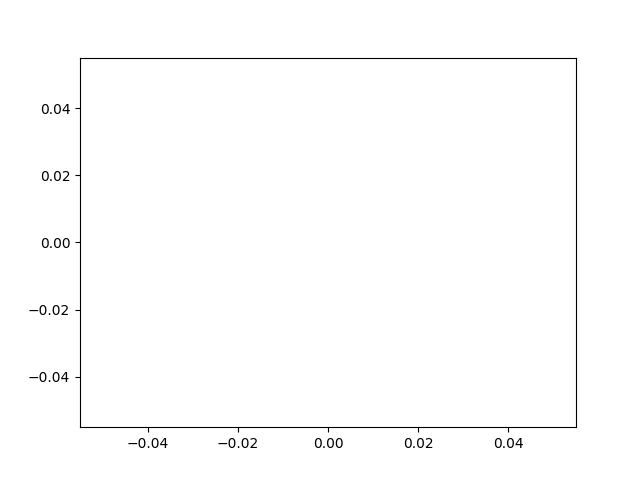

In [65]:
# this cell approximates the guassian initial condition by the sum of n standing waves

plt.close('all')

n_waves = 5 # of standing waves
L = 0.1 # 1 meter long system terminated on both ends
dx = 0.001 # spatial sampling rate
c = 1.0 # wavespeed in medium

dt=dx/c/4 # define timestep to satisfy CFL condition. Info cannot travel further than dx during a timestep dt

nsteps = 200 #number of simulated timesteps

# Define the Fourier series function
def fourier_series(x_, *coeffs):
    n = len(coeffs)
    result = 0
    for i in range(0, n):
        an = coeffs[i]
        result += an * np.sin(np.pi*(i+1)*x_)
    return result

# Generate some sample data

x = np.arange(0, L*(1+dx), dx) 
npts = len(x) # number of spatial points along x

xc = L/2
y = np.zeros((npts, 3)) #initalize three time samples
y[:, 0] = np.exp((-(x-xc)**2)/(0.0001)) # initial condition

# Initial guesses for the parameters
initial_guesses = [1] + [0] * n_waves # a0, a1, b1, a2, b2

# Perform curve fitting
popt, pcov = curve_fit(fourier_series, x, y[:,0], p0=initial_guesses)

# Generate fitted curve
y_simulated = np.zeros((npts, 3)) #initalize three time samples
y_simulated[:,0] = fourier_series(x, *popt)

# Plot the results
plt.plot(x, y[:,0], 'o', label='Original Data')
plt.plot(x, y_simulated[:,0], '-', label='Fitted Curve')
plt.title('Initial Condition')
plt.legend()
plt.show()


## Create the figure and axes
#fig, ax = plt.subplots()
#line, = ax.plot([], [])
#
## Initialization function: plot the background of each frame
#def init():
#    ax.set_xlim(0, L)
#    ax.set_ylim(-2, 2)
#    return line,
##plot animated wave equation
#y[1:-1, 1] = y[1:-1, 0] + 0.5*c**2*(dt/dx)**2 * (y[2:,0] + y[:-2,0]-2*y[1:-1,0]) # initialize array
#
## Animation function: called sequentially
#def animate(k):
#    y[1:-1,2] = 2*y[1:-1,1] - y[1:-1,0] + c**2*(dt/dx)**2 * (y[2:,1] + y[:-2,1] - 2*y[1:-1,1])
#    y[1:-1,0] = y[1:-1,1]
#    y[1:-1,1] = y[1:-1,2]
#    line.set_data(x, y[:,2])
#    return line,
#    #return y[:,2]
#
#
## Create the animation
#ani = animation.FuncAnimation(fig, animate, init_func=init, frames=nsteps, interval=20, blit=True)

#plot animated wave equation
# Create the figure and axes
fig_sim, ax_sim = plt.subplots()
line_sim, = ax_sim.plot([], [])

# Initialization function: plot the background of each frame
def init_sim():
    ax_sim.set_xlim(0, L)
    ax_sim.set_ylim(-2, 2)
    return line_sim,

y_simulated[1:-1, 1] = y_simulated[1:-1, 0] + 0.5*c**2*(dt/dx)**2 * (y_simulated[2:,0] + y_simulated[:-2,0]-2*y_simulated[1:-1,0]) # initialize array

# Animation function: called sequentially
def animate_sim(k):
    y_simulated[1:-1,2] = 2*y_simulated[1:-1,1] - y_simulated[1:-1,0] + c**2*(dt/dx)**2 * (y_simulated[2:,1] + y_simulated[:-2,1] - 2*y_simulated[1:-1,1])
    y_simulated[1:-1,0] = y_simulated[1:-1,1]
    y_simulated[1:-1,1] = y_simulated[1:-1,2]
    line_sim.set_data(x, y_simulated[:,2])
    return line_sim,
    #return y[:,2]


# Create the animation
ani_sim = animation.FuncAnimation(fig_sim, animate_sim, init_func=init_sim, frames=nsteps, interval=20, blit=True, )

#ani_sim.save('gaussian_pulse_fourier.gif', writer='pillow')

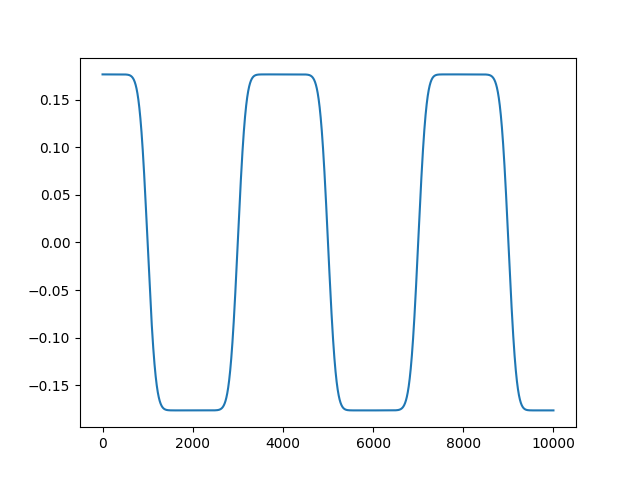

In [18]:
#Average value of gaussian pulse wave
plt.close('all')

L = 1.0 # 1 meter long system terminated on both ends
dx = 0.005 # spatial sampling rate
c = 5.0 # wavespeed in medium

time_sim = 1 #number of seconds of simulated time
fs = 10000
dt = 1/fs
if dt > (dx/c):
    raise SystemExit("CFL condition not met")


#dt=dx/c # define timestep to satisfy CFL condition. Info cannot travel further than dx during a timestep dt

x = np.arange(0, L*(1+dx), dx) # create spatial coordinate system
npts = len(x) # number of spatial points along x

nsteps = int(np.floor(fs*time_sim)) #number of simulated timesteps
average_out = np.zeros((nsteps, 1))

y = np.zeros((npts, 3)) #initalize three time samples

xc = L/2
y[:, 0] = np.exp((-(x-xc)**2)/(0.01)) # initial condition

y[1:-1, 1] = y[1:-1, 0] + 0.5*c**2*(dt/dx)**2 * (y[2:,0] + y[:-2,0]-2*y[1:-1,0]) # initialize array


for k in range (nsteps):
    y[1:-1,2] = 2*y[1:-1,1] - y[1:-1,0] + c**2*(dt/dx)**2 * (y[2:,1] + y[:-2,1] - 2*y[1:-1,1])
    y[1:-1,0] = y[1:-1,1]
    y[1:-1,1] = y[1:-1,2]
    average_out[k] = np.mean(y[:,2])


#plt.plot(y[:,2])
plt.plot(average_out)



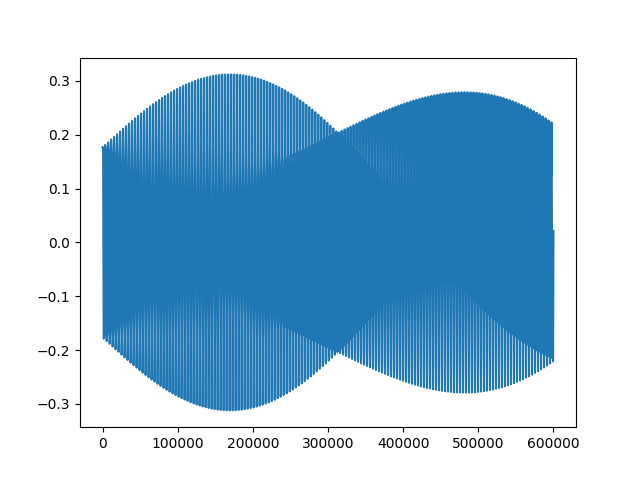

In [13]:
#Average value of gaussian pulse wave with elasticity
plt.close('all')

L = 1.0 # 1 meter long system terminated on both ends
dx = 0.001 # spatial sampling rate
c = 10.0 # wavespeed in medium
mu = 10 #loss coeff

time_sim = 30 #number of seconds of simulated time
fs = 20000
dt = 1/fs
if dt > (dx/c):
    raise SystemExit("CFL condition not met")


#dt=dx/c # define timestep to satisfy CFL condition. Info cannot travel further than dx during a timestep dt

x = np.arange(0, L*(1+dx), dx) # create spatial coordinate system
npts = len(x) # number of spatial points along x

nsteps = int(np.floor(fs*time_sim)) #number of simulated timesteps
average_out = np.zeros((nsteps, 1))

y = np.zeros((npts, 3)) #initalize three time samples

xc = L/2
y[:, 0] = np.exp((-(x-xc)**2)/(0.01)) # initial condition

y[1:-1, 1] = y[1:-1, 0] + 0.5*c**2*(dt/dx)**2 * (y[2:,0] + y[:-2,0]-2*y[1:-1,0]) # initialize array


for k in range (nsteps):
    y[1:-1,2] = 2*y[1:-1,1] - y[1:-1,0] + c**2*(dt/dx)**2 * (y[2:,1] + y[:-2,1] - 2*y[1:-1,1]) -mu*y[1:-1,1]*dt**2
    y[1:-1,0] = y[1:-1,1]
    y[1:-1,1] = y[1:-1,2]
    average_out[k] = np.mean(y[:,2])


#plt.plot(y[:,2])
plt.plot(average_out)


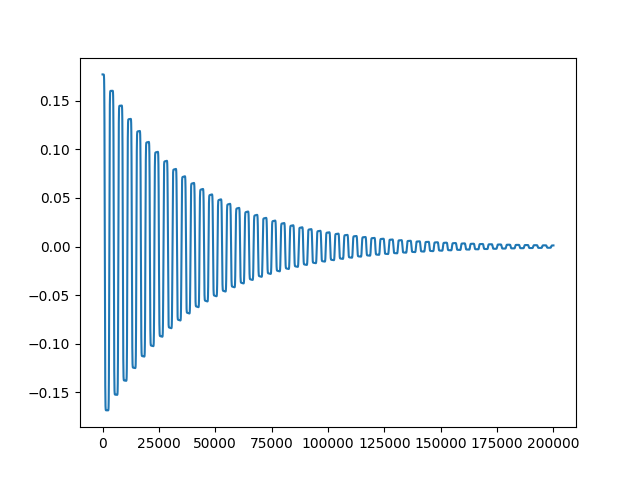

In [31]:
#Average value of gaussian pulse wave with loss
plt.close('all')

L = 1.0 # 1 meter long system terminated on both ends
dx = 0.001 # spatial sampling rate
c = 10.0 # wavespeed in medium
mu = 1 #loss coeff

time_sim = 10 #number of seconds of simulated time
fs = 20000
dt = 1/fs
if dt > (dx/c):
    raise SystemExit("CFL condition not met")


#dt=dx/c # define timestep to satisfy CFL condition. Info cannot travel further than dx during a timestep dt

x = np.arange(0, L*(1+dx), dx) # create spatial coordinate system
npts = len(x) # number of spatial points along x

nsteps = int(np.floor(fs*time_sim)) #number of simulated timesteps
average_out = np.zeros((nsteps, 1))

y = np.zeros((npts, 3)) #initalize three time samples

xc = L/2
y[:, 0] = np.exp((-(x-xc)**2)/(0.01)) # initial condition

y[1:-1, 1] = y[1:-1, 0] + 0.5*c**2*(dt/dx)**2 * (y[2:,0] + y[:-2,0]-2*y[1:-1,0]) # initialize array


for k in range (nsteps):
    y[1:-1,2] = 2*y[1:-1,1] - y[1:-1,0] + c**2*(dt/dx)**2 * (y[2:,1] + y[:-2,1] - 2*y[1:-1,1]) -mu*(y[1:-1,1]-y[1:-1,0])*dt
    y[1:-1,0] = y[1:-1,1]
    y[1:-1,1] = y[1:-1,2]
    average_out[k] = np.mean(y[:,2])


#plt.plot(y[:,2])
plt.plot(average_out)

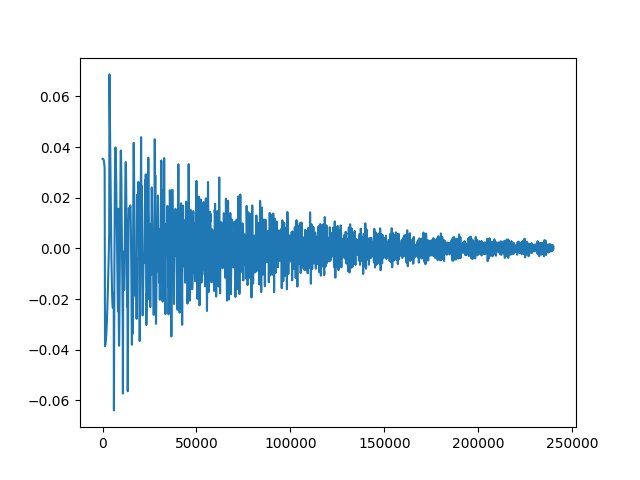

In [29]:
#Average value of gaussian pulse wave with loss and elasticity
plt.close('all')

output_filename = 'lossy_elastic_average.wav'

L = 0.5 # 1 meter long system terminated on both ends
dx = 0.001 # spatial sampling rate
c = 10.0 # wavespeed in medium
mu = 1 #loss coeff
k = 1# elasticity coeff

time_sim = 5 #number of seconds of simulated time
fs = 48000
dt = 1/fs
if dt > (dx/c):
    raise SystemExit("CFL condition not met")


#dt=dx/c # define timestep to satisfy CFL condition. Info cannot travel further than dx during a timestep dt

x = np.arange(0, L*(1+dx), dx) # create spatial coordinate system
npts = len(x) # number of spatial points along x

nsteps = int(np.floor(fs*time_sim)) #number of simulated timesteps
average_out = np.zeros((nsteps, 1))

y = np.zeros((npts, 3)) #initalize three time samples

xc = L/2
y[:, 0] = np.exp((-(x-xc)**2)/(0.0001)) # initial condition

y[1:-1, 1] = y[1:-1, 0] + 0.5*c**2*(dt/dx)**2 * (y[2:,0] + y[:-2,0]-2*y[1:-1,0]) # initialize array


for k in range (nsteps):
    y[1:-1,2] = 2*y[1:-1,1] - y[1:-1,0] + c**2*(dt/dx)**2 * (y[2:,1] + y[:-2,1] - 2*y[1:-1,1]) -mu*(y[1:-1,1]-y[1:-1,0])*dt- k*y[1:-1,1]*dt**2
    y[1:-1,0] = y[1:-1,1]
    y[1:-1,1] = y[1:-1,2]
    average_out[k] = np.mean(y[:,2])


audio = (average_out*32767).astype(np.int16)
wavfile.write(output_filename, fs, audio)
#plt.plot(y[:,2])
plt.plot(average_out)

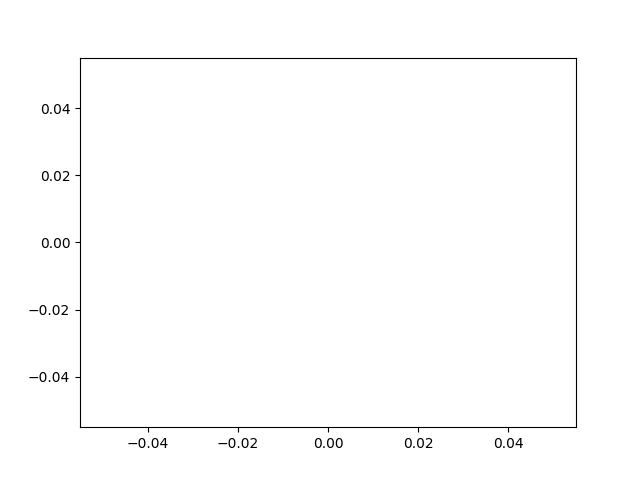

In [45]:
#Gaussian Pulse in medium with inhomogeneous wavespeed
plt.close('all')

L = 1.0 # 1 meter long system terminated on both ends
dx = 0.005 # spatial sampling rate
#c = 1.0

x = np.arange(0, L*(1+dx), dx) 
npts = len(x) # number of spatial points along x
c = np.zeros(npts-2)

c[:] = 1.0
c[int(npts/5.0):] = 0.5

dt=dx/2.0 # define timestep to satisfy CFL condition. Info cannot travel further than dx during a timestep dt
nsteps = 400 #number of simulated timesteps

# Create the figure and axes
fig, ax = plt.subplots()
line, = ax.plot([], [])

# Initialization function: plot the background of each frame
def init():
    ax.set_xlim(0, L)
    ax.set_ylim(-2, 2)
    return line,

y = np.zeros((npts, 3)) #initalize three time samples

xc = L/2
y[:, 0] = np.exp((-(x-xc)**2)/(0.001)) # initial condition

y[1:-1, 1] = y[1:-1, 0] + 0.5*c**2*(dt/dx)**2 * (y[2:,0] + y[:-2,0]-2*y[1:-1,0]) # initialize array

# Animation function: called sequentially
def animate(k):
    y[1:-1,2] = 2*y[1:-1,1] - y[1:-1,0] + c**2*(dt/dx)**2 * (y[2:,1] + y[:-2,1] - 2*y[1:-1,1])
    y[1:-1,0] = y[1:-1,1]
    y[1:-1,1] = y[1:-1,2]
    line.set_data(x, y[:,2])
    return line,
    #return y[:,2]


# Create the animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=nsteps, interval=20, blit=True)

plt.show()

# Save the animation as a GIF
#ani.save('gaussian_pulse.gif', writer='pillow')